# Login

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install huggingface_hub -q
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [3]:
!pip install wandb

import wandb
wandb.login()

     |████████████████████████████████| 1.7 MB 4.1 MB/s 
     |████████████████████████████████| 181 kB 35.1 MB/s 
     |████████████████████████████████| 144 kB 52.2 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=4db52e42dc9d38b386668a3b748fc7a8fd687025c075e0449ac83a765a4a503f
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# Import and download

In [4]:
!pip install transformers -q
!pip install datasets -q
!pip install huggingface_hub -q

import transformers

     |████████████████████████████████| 3.8 MB 3.6 MB/s 
     |████████████████████████████████| 6.5 MB 38.1 MB/s 
     |████████████████████████████████| 895 kB 38.4 MB/s 
     |████████████████████████████████| 596 kB 46.5 MB/s 
     |████████████████████████████████| 312 kB 4.1 MB/s 
     |████████████████████████████████| 212 kB 43.5 MB/s 
     |████████████████████████████████| 134 kB 52.6 MB/s 
     |████████████████████████████████| 1.1 MB 44.8 MB/s 
     |████████████████████████████████| 127 kB 37.6 MB/s 
     |████████████████████████████████| 144 kB 55.1 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
     |████████████████████████████████| 271 kB 64.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [5]:
!wget https://github.com/alibashir/aav/raw/main/allseqs_20191230.csv.zip --no-verbose
!unzip allseqs_20191230.csv.zip
!rm allseqs_20191230.csv.zip

2022-03-10 19:37:12 URL:https://raw.githubusercontent.com/alibashir/aav/main/allseqs_20191230.csv.zip [8437043/8437043] -> "allseqs_20191230.csv.zip" [1]
Archive:  allseqs_20191230.csv.zip
  inflating: allseqs_20191230.csv    


#Dataset

In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv("./allseqs_20191230.csv")
df.shape

(296970, 7)

In [7]:
df.head(2)

,sequence,partition,mutation_sequence,num_mutations,num_edits,viral_selection,is_viable
0,ADEEIRATNPIATEMYGSVSTNLQLGNR,designed,AD____A___I___M_________L___,6,6,-2.027259,False
1,ADEEIRATNPVATEQYGSVSTNQQRQNR,designed,AD____A_______________Q__Q__,5,5,-0.429554,True


In [8]:
df['sequence']= df['sequence'].str.upper()
df.head(2)

,sequence,partition,mutation_sequence,num_mutations,num_edits,viral_selection,is_viable
0,ADEEIRATNPIATEMYGSVSTNLQLGNR,designed,AD____A___I___M_________L___,6,6,-2.027259,False
1,ADEEIRATNPVATEQYGSVSTNQQRQNR,designed,AD____A_______________Q__Q__,5,5,-0.429554,True


In [9]:
df['sequence'] = df['sequence'].apply(lambda seq : " ".join(seq.upper()))
df.head(2)

,sequence,partition,mutation_sequence,num_mutations,num_edits,viral_selection,is_viable
0,A D E E I R A T N P I A T E M Y G S V S T N L ...,designed,AD____A___I___M_________L___,6,6,-2.027259,False
1,A D E E I R A T N P V A T E Q Y G S V S T N Q ...,designed,AD____A_______________Q__Q__,5,5,-0.429554,True


In [10]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
df = df.sample(frac=1).reset_index(drop=True)

#df_train = df.sample(frac = 0.90).reset_index(drop=True)
#df_test = df.drop(list(df_train.index)).reset_index(drop=True)

(array([1.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+00, 1.1000e+01,
        2.4000e+01, 4.7000e+01, 1.0500e+02, 2.0100e+02, 3.1200e+02,
        4.9100e+02, 7.7200e+02, 9.7900e+02, 1.5170e+03, 1.7830e+03,
        2.3600e+03, 2.7710e+03, 3.4430e+03, 3.9240e+03, 4.6930e+03,
        5.0530e+03, 6.0640e+03, 6.3420e+03, 6.7530e+03, 7.2720e+03,
        7.7670e+03, 7.6920e+03, 7.7180e+03, 7.5970e+03, 6.9380e+03,
        6.7340e+03, 5.9670e+03, 5.6930e+03, 5.1310e+03, 4.5490e+03,
        4.1810e+03, 3.7740e+03, 3.3580e+03, 2.9730e+03, 2.7020e+03,
        2.4180e+03, 2.2660e+03, 2.0520e+03, 1.8840e+03, 1.9130e+03,
        1.9200e+03, 1.9210e+03, 2.0120e+03, 2.1060e+03, 2.2310e+03,
        2.5620e+03, 3.1710e+03, 3.9100e+03, 5.2750e+03, 7.4930e+03,
        1.0899e+04, 1.5170e+04, 1.8883e+04, 2.0058e+04, 1.6902e+04,
        1.1576e+04, 7.0610e+03, 4.2100e+03, 2.6230e+03, 1.7720e+03,
        1.3060e+03, 9.9700e+02, 8.8600e+02, 6.6300e+02, 6.0200e+02,
        4.5300e+02, 3.6700e+02, 3.2000e+02, 2.60

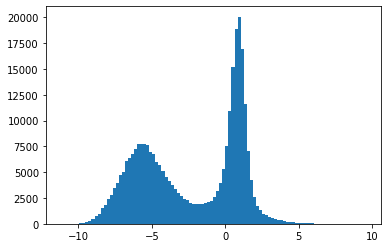

In [11]:
import matplotlib.pyplot as plt

plt.hist(df.viral_selection, bins=100)

In [12]:
df=df.drop(df[df['viral_selection'] < -2.06258027].index)
df=df.drop(df[df['viral_selection'] > 4.22927646].index)

df.shape

(149610, 7)

(array([ 588.,  574.,  582.,  603.,  582.,  572.,  580.,  541.,  583.,
         629.,  603.,  597.,  614.,  645.,  621.,  678.,  628.,  659.,
         683.,  726.,  734.,  796.,  806.,  942.,  931., 1008., 1030.,
        1111., 1244., 1365., 1521., 1606., 1773., 1999., 2246., 2544.,
        2794., 3215., 3475., 3952., 4372., 4717., 5156., 5412., 5970.,
        5908., 6100., 6131., 6081., 5754., 5442., 4970., 4379., 3850.,
        3438., 3010., 2548., 2212., 1803., 1650., 1349., 1103.,  944.,
         893.,  739.,  682.,  570.,  529.,  506.,  447.,  424.,  360.,
         332.,  308.,  297.,  296.,  305.,  250.,  235.,  206.,  213.,
         192.,  191.,  185.,  168.,  174.,  149.,  139.,  119.,  128.,
         111.,   98.,   90.,  102.,   92.,  112.,   67.,   91.,   64.,
          67.]),
 array([-2.06242554, -1.99951675, -1.93660796, -1.87369918, -1.81079039,
        -1.7478816 , -1.68497282, -1.62206403, -1.55915524, -1.49624646,
        -1.43333767, -1.37042888, -1.3075201 , -1.244611

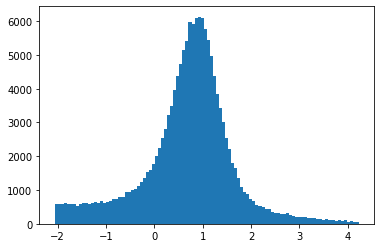

In [13]:
plt.hist(df.viral_selection, bins=100)

In [14]:
#df = df.sample(frac=0.20).reset_index(drop=True)
df.shape

(149610, 7)

# sequence tokenization

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("Rostlab/prot_bert_bfd")
max_length=50

def tokenize_function(examples):
    return tokenizer(examples['sequence'], padding="max_length", max_length=max_length, return_tensors="tf")

Downloading:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/361 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/81.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
train_seqs = df['sequence'].tolist()
train_ids = tokenizer(train_seqs, add_special_tokens=True, padding='max_length', max_length=50, return_tensors="tf")

input_ids = train_ids['input_ids']
attention_mask = train_ids['attention_mask']
token_type_ids = train_ids['token_type_ids']

In [ ]:
train_ids

{'input_ids': <tf.Tensor: shape=(142153, 50), dtype=int32, numpy=
array([[ 2,  9, 14, ...,  0,  0,  0],
       [ 2,  8, 14, ...,  0,  0,  0],
       [ 2, 15, 10, ...,  0,  0,  0],
       ...,
       [ 2, 14,  9, ...,  0,  0,  0],
       [ 2, 14,  9, ...,  0,  0,  0],
       [ 2,  6,  9, ...,  0,  0,  0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(142153, 50), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(142153, 50), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [ ]:
y_train = np.asarray(df['viral_selection'])
y_train

array([-7.83534953, -5.79302095, -7.4652379 , ..., -3.20794727,
       -5.19674906, -3.88236778])

# BERT model for embedding

In [ ]:
from transformers import TFAutoModel

model = TFAutoModel.from_pretrained("Rostlab/prot_bert_bfd", 
                                    from_pt=True, output_hidden_states=True
                                    )

Downloading:   0%|          | 0.00/1.57G [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint

# Freeze all BERT layer

In [ ]:
# Let's print the layers of the model
for layer in model.layers[:]:
    print(layer)

In [ ]:
for layer in model.layers[:]:
    if isinstance(layer, transformers.models.bert.modeling_tf_bert.TFBertMainLayer):
        print(layer.embeddings)
        print(layer.encoder)
        print(layer.pooler)

In [ ]:
for layer in model.layers[:]:
    if isinstance(layer, transformers.models.bert.modeling_tf_bert.TFBertMainLayer):
       for layer in layer.encoder.layer:
            print(layer)

In [ ]:
#freeze all encoder layer

for layer in model.layers[:]:
    if isinstance(layer, transformers.models.bert.modeling_tf_bert.TFBertMainLayer):
       for idx, layer in enumerate(layer.encoder.layer):
           if idx in range(30):
              layer.trainable = False


for layer in model.layers[:]:
    if isinstance(layer, transformers.models.bert.modeling_tf_bert.TFBertMainLayer):
       for idx, layer in enumerate(layer.encoder.layer):
           print(layer, layer.trainable)

<transformers.models.bert.modeling_tf_bert.TFBertLayer object at 0x7f8a8a6ec210> False
<transformers.models.bert.modeling_tf_bert.TFBertLayer object at 0x7f8a8a788550> False
<transformers.models.bert.modeling_tf_bert.TFBertLayer object at 0x7f8a8a91a610> False
<transformers.models.bert.modeling_tf_bert.TFBertLayer object at 0x7f8a8a7af7d0> False
<transformers.models.bert.modeling_tf_bert.TFBertLayer object at 0x7f8a8a7a7990> False
<transformers.models.bert.modeling_tf_bert.TFBertLayer object at 0x7f8a8a712b10> False
<transformers.models.bert.modeling_tf_bert.TFBertLayer object at 0x7f8a8a72bd10> False
<transformers.models.bert.modeling_tf_bert.TFBertLayer object at 0x7f8a8a71bed0> False
<transformers.models.bert.modeling_tf_bert.TFBertLayer object at 0x7f8a8a617150> False
<transformers.models.bert.modeling_tf_bert.TFBertLayer object at 0x7f8a8a788510> False
<transformers.models.bert.modeling_tf_bert.TFBertLayer object at 0x7f8a8a627590> False
<transformers.models.bert.modeling_tf_bert.

In [ ]:
#freeze embeddings and pooler layer

for layer in model.layers[:]:
    if isinstance(layer, transformers.models.bert.modeling_tf_bert.TFBertMainLayer):
      layer.embeddings.trainable = False
      layer.pooler.trainable = False

In [ ]:
model.summary()

Model: "tf_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  419931136 
                                                                 
Total params: 419,931,136
Trainable params: 0
Non-trainable params: 419,931,136
_________________________________________________________________


# Add regression layer

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam


input_ids = tf.keras.Input(shape=(max_length,), dtype='int32')
token_type_ids = tf.keras.Input(shape=(max_length,), dtype='int32')
attention_mask = tf.keras.Input(shape=(max_length,), dtype='int32')

output = model([input_ids, token_type_ids, attention_mask])    
output = output['pooler_output']


output = tf.keras.layers.Dense(512, activation='relu', input_shape=(None,1024), kernel_initializer=tf.keras.initializers.HeNormal())(output)
output = tf.keras.layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal())(output)
output = tf.keras.layers.Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal())(output)
output = tf.keras.layers.Dense(1)(output)

regressor = tf.keras.models.Model(inputs = [input_ids, token_type_ids, attention_mask], outputs = output)


regressor.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  419931136   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]',            

# Tokenization for huggingface format

In [19]:
df=df.reset_index()
df.head(2)

,level_0,index,sequence,partition,mutation_sequence,num_mutations,num_edits,viral_selection,is_viable
0,0,1,F E E E I R T T N P V A T E Q Y G S V V Y D G ...,rnn_rand_doubles_plus_singles_walked,F________________sVvYdGmFgQeGeEeEDDqG,21,18,-1.630402,True
1,1,2,D E E E I R T T N P V A T E Q Y G S V S A T N ...,designed,____________________a____eVn___,4,4,1.087112,True


In [20]:
labels = []

for i in range(df.shape[0]):
  if df.viral_selection[i] > 0.5:
    labels.append(1)
  else:
    labels.append(0)

df['labels'] = labels

In [21]:
#df['labels'] = df['viral_selection'] * 1

In [22]:
from datasets import Dataset

dataset = Dataset.from_pandas(df[['sequence','labels']])
dataset

Dataset({
    features: ['sequence', 'labels'],
    num_rows: 149610
})

In [23]:
dataset = dataset.train_test_split(test_size=0.25, shuffle=True)

df_train = dataset['train']
df_test = dataset['test']

df_test = df_test.train_test_split(test_size=0.1, shuffle=True)
df_val = df_test['train']
df_test = df_test['test']

df_train, df_val, df_test

(Dataset({
     features: ['sequence', 'labels'],
     num_rows: 112207
 }), Dataset({
     features: ['sequence', 'labels'],
     num_rows: 33662
 }), Dataset({
     features: ['sequence', 'labels'],
     num_rows: 3741
 }))

In [24]:
df_train[10]

{'labels': 1,
 'sequence': 'D E E E I R T T N P V A T E Q Y G S V S T N L Q R E G N L'}

In [25]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False)
max_length=50

def preprocess_function(examples):
    return tokenizer(examples['sequence'], padding="max_length", max_length=max_length)

Downloading:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/361 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/81.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [26]:
df_train = df_train.map(preprocess_function, batched=True)
df_val = df_val.map(preprocess_function, batched=True)
df_test = df_test.map(preprocess_function, batched=True)

  0%|          | 0/113 [00:00<?, ?ba/s]

  0%|          | 0/34 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

# Convert dataset if using TF model for training

In [19]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer, return_tensors="tf")

In [20]:
batch_size = 25

In [21]:
tf_train = df_train.to_tf_dataset(
    columns=["attention_mask", "input_ids", "labels"],
    shuffle=True,
    batch_size=batch_size,
    collate_fn=data_collator,
)

tf_val = df_val.to_tf_dataset(
    columns=["attention_mask", "input_ids", "labels"],
    shuffle=False,
    batch_size=batch_size,
    collate_fn=data_collator,
)

tf_test = df_test.to_tf_dataset(
    columns=["attention_mask", "input_ids", "labels"],
    shuffle=False,
    batch_size=batch_size,
    collate_fn=data_collator,
)

# test on validation set (before training)

In [ ]:
predictions = classifier.predict(tf_val)["logits"]
predicted_class = np.squeeze(predictions)

In [ ]:
predicted_class

array([-0.01055058, -0.01052031, -0.01054399, ..., -0.01056628,
       -0.01062202, -0.01056743], dtype=float32)

In [ ]:
y_test = list(map(lambda x: x['labels'], df_val))
y_test = np.asarray(y_test)

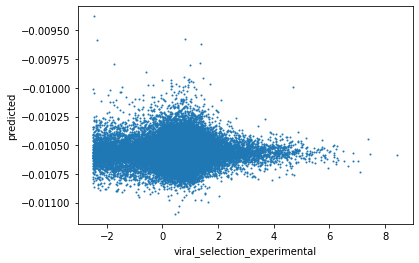

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predicted_class, s=1)
plt.xlabel("viral_selection_experimental")
plt.ylabel("predicted")
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score     #(y_true, y_pred, *)

array1 = np.asarray(y_test)
array2 = np.asarray(predicted_class)


mae = mae(array1,array2)
mse = mse(array1,array2)
r2_score = r2_score(array1,array2)

mae, mse, r2_score

(1.0509403440285763, 1.654209047889093, -0.3400304232206275)

# Fine-tune the model

In [27]:
import torch
from transformers import AutoTokenizer, Trainer, TrainingArguments, AutoModelForSequenceClassification
from torch.utils.data import Dataset
import os
import pandas as pd
import requests
from tqdm.auto import tqdm
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import re

In [28]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [29]:
model_name = 'Rostlab/prot_bert_bfd'

def model_init():
  return AutoModelForSequenceClassification.from_pretrained(model_name)


training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    warmup_steps=100, weight_decay=0.01,
    learning_rate=5e-5,
    do_train=True,
    do_eval=True,
    evaluation_strategy="epoch",
    gradient_accumulation_steps=16,
    logging_steps=32,
    fp16=True, fp16_opt_level="02",
    run_name="ProBertBFD_AAV2-classification",
    report_to="wandb"
)

trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=df_train,
    eval_dataset=df_val,
    compute_metrics = compute_metrics,
)

https://huggingface.co/Rostlab/prot_bert_bfd/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpde18r7qk


Downloading:   0%|          | 0.00/361 [00:00<?, ?B/s]

storing https://huggingface.co/Rostlab/prot_bert_bfd/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/67f460acc7e7e147ff828e909ffe419d00d66ce679c682bc4ab715c107bcbe41.baf557855a8618d0ddfb6c23bfd135bfc38ccf8c3fb099b8df45eb110ccf05e9
creating metadata file for /root/.cache/huggingface/transformers/67f460acc7e7e147ff828e909ffe419d00d66ce679c682bc4ab715c107bcbe41.baf557855a8618d0ddfb6c23bfd135bfc38ccf8c3fb099b8df45eb110ccf05e9
loading configuration file https://huggingface.co/Rostlab/prot_bert_bfd/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/67f460acc7e7e147ff828e909ffe419d00d66ce679c682bc4ab715c107bcbe41.baf557855a8618d0ddfb6c23bfd135bfc38ccf8c3fb099b8df45eb110ccf05e9
Model config BertConfig {
  "_name_or_path": "Rostlab/prot_bert_bfd",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.0,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "i

Downloading:   0%|          | 0.00/1.57G [00:00<?, ?B/s]

storing https://huggingface.co/Rostlab/prot_bert_bfd/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/0a05878f9e3a0d39834dc6f21b88471696d7453a07bac7246152a6ef307c9af4.c5b9869da882baaf70e8e70cf32d81500803511e3220e24457115a03445fa65f
creating metadata file for /root/.cache/huggingface/transformers/0a05878f9e3a0d39834dc6f21b88471696d7453a07bac7246152a6ef307c9af4.c5b9869da882baaf70e8e70cf32d81500803511e3220e24457115a03445fa65f
loading weights file https://huggingface.co/Rostlab/prot_bert_bfd/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/0a05878f9e3a0d39834dc6f21b88471696d7453a07bac7246152a6ef307c9af4.c5b9869da882baaf70e8e70cf32d81500803511e3220e24457115a03445fa65f
Some weights of the model checkpoint at Rostlab/prot_bert_bfd were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.d

In [30]:
trainer.train()
wandb.finish()

loading configuration file https://huggingface.co/Rostlab/prot_bert_bfd/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/67f460acc7e7e147ff828e909ffe419d00d66ce679c682bc4ab715c107bcbe41.baf557855a8618d0ddfb6c23bfd135bfc38ccf8c3fb099b8df45eb110ccf05e9
Model config BertConfig {
  "_name_or_path": "Rostlab/prot_bert_bfd",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.0,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 40000,
  "model_type": "bert",
  "num_attention_heads": 16,
  "num_hidden_layers": 30,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.17.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30
}

loading weights file https://huggingface.co/Rostlab/prot_bert_bfd/resolve/main/pytorch_mode

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.642200,0.638606,0.663538,0.797743,0.663538,1.000000
1,0.644700,0.638852,0.663538,0.797743,0.663538,1.000000
2,0.645100,0.638717,0.663538,0.797743,0.663538,1.000000


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sequence. If sequence are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 33662
  Batch size = 32
Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sequence. If sequence are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 33662
  Batch size = 32
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./resul

eval/accuracy,▁▁▁
eval/f1,▁▁▁
eval/loss,▁█▄
eval/precision,▁▁▁
eval/recall,▁▁▁
eval/runtime,▁▃█
eval/samples_per_second,█▆▁
eval/steps_per_second,█▅▁
train/epoch,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇████
train/global_step,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇████
train/learning_rate,▃▆████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁


In [31]:
trainer.save_model('models/')

Saving model checkpoint to models/
Configuration saved in models/config.json
Model weights saved in models/pytorch_model.bin


# test on validation set (after training)

In [ ]:
import os

predictions = classifier.predict(tf_val)["logits"]
predicted_class = np.squeeze(predictions)

output_test_file = os.path.join('./', "val_results.txt")
with open(output_test_file, "w") as writer:
  writer.write("index\tprediction\n")
  for index, item in enumerate(predicted_class):
    writer.write(f"{index}\t{item:3.9f}\n")

In [ ]:
y_test = list(map(lambda x: x['labels'], df_val))
y_test = np.asarray(y_test)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predicted_class, s=1)
plt.xlabel("viral_selection_experimental")
plt.ylabel("predicted")
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score     #(y_true, y_pred, *)

array1 = np.asarray(y_test)
array2 = np.asarray(predicted_class)


mae = mae(array1,array2)
mse = mse(array1,array2)
r2_score = r2_score(array1,array2)

mae, mse, r2_score

# test on test set

In [ ]:
import os

predictions = classifier.predict(tf_test)["logits"]
predicted_class = np.squeeze(predictions)

output_test_file = os.path.join('./', "test_results.txt")
with open(output_test_file, "w") as writer:
  writer.write("index\tprediction\n")
  for index, item in enumerate(predicted_class):
    writer.write(f"{index}\t{item:3.9f}\n")

In [ ]:
y_test = list(map(lambda x: x['labels'], df_test))
y_test = np.asarray(y_test)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predicted_class, s=1)
plt.xlabel("viral_selection_experimental")
plt.ylabel("predicted")
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score     #(y_true, y_pred, *)

array1 = np.asarray(y_test)
array2 = np.asarray(predicted_class)


mae = mae(array1,array2)
mse = mse(array1,array2)
r2_score = r2_score(array1,array2)

mae, mse, r2_score

# Upload to huggingface hub

In [ ]:
new_model_name = 'AAV2-Albert-regressor'

classifier.push_to_hub(new_model_name)
tokenizer.push_to_hub(new_model_name)